In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization 
import seaborn as sns  #Python library for Vidualization

In [2]:
dataset = pd.read_csv('2017.csv')

In [3]:
dataset.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


In [6]:
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [7]:
dataset.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
X1= dataset.iloc[:, [8]].values
X2= dataset.iloc[:, [10]].values
X1 = minmax_scale(X1)
X2 = minmax_scale(X2)
X = np.hstack([X1,X2])
X

array([[0.96532302, 0.68050514],
       [0.9510186 , 0.86315604],
       [0.95277464, 0.33065687],
       [0.94200051, 0.79043965],
       [0.93878027, 0.82404723],
       [0.889306  , 0.60878115],
       [0.92837395, 0.61892461],
       [0.93287258, 0.82448909],
       [0.93114371, 0.82789637],
       [0.91395154, 0.64867258],
       [0.61677088, 0.18358964],
       [0.88132598, 0.21560394],
       [0.86254059, 0.47610739],
       [0.76831227, 0.2921312 ],
       [0.87065933, 0.64265163],
       [0.85455758, 0.59600969],
       [0.82001036, 0.5413287 ],
       [0.90638679, 0.68668765],
       [0.77203353, 0.57166404],
       [0.5725728 , 0.17722723],
       [0.92418763, 0.69886738],
       [0.66457218, 0.23926534],
       [0.74583695, 0.07941484],
       [0.75126503, 0.12866441],
       [0.6270123 , 0.28596142],
       [0.8353083 , 1.        ],
       [0.89444474, 0.32966509],
       [0.88020271, 0.38349965],
       [0.80715791, 0.16631916],
       [0.83559127, 0.15288118],
       [0.

In [26]:
from sklearn.cluster import KMeans
score=[]

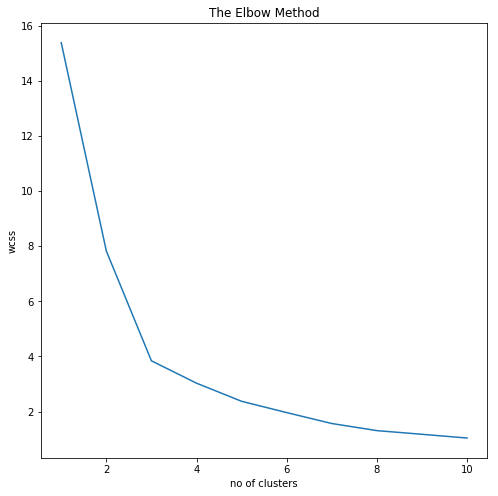

In [27]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 8))
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [28]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

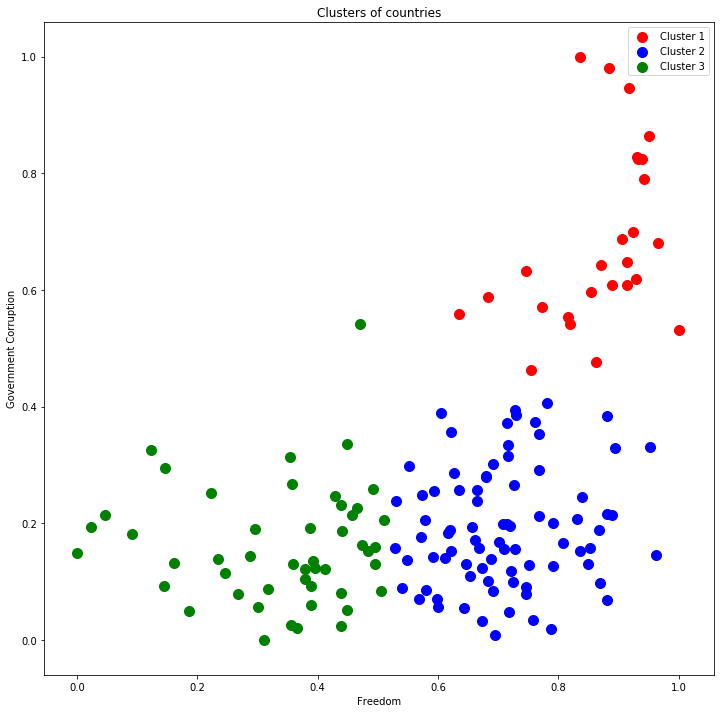

In [31]:
plt.figure(figsize=(12, 12))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of countries')
plt.xlabel('Freedom')
plt.ylabel('Government Corruption')
plt.legend()
plt.show()


In [ ]:
#정부가 부패한 국가에서는 대체로 자유도가 높다?!?!